In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 대학주요정보2.xlsx to 대학주요정보2.xlsx


In [3]:
df = pd.read_excel('대학주요정보2.xlsx')
df.head()

,university_name,campus_name,school_type,school_category,establishment_type,region_name,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,undergrad_students_2023,...,international_students_2023,students_per_faculty_2023,faculty_ratio_based_on_quota_2023,faculty_ratio_based_on_enrollment_2023,faculty_teaching_ratio_2023,scholarship_per_student_2023,annual_tuition_2024,education_cost_per_student_2023,dorm_capacity_rate_2023,books_per_student_2023
0,ICT폴리텍대학,본교,전문대학,기능대학,사립,경기,160,114,15,287,...,1,21.33,93.75,100.00,69.0,2194708.2,2500.0,30475.9,86.7,36.0
1,가야대학교(고령),제2캠퍼스,대학,대학교,사립,경북,0,0,0,0,...,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,가야대학교(김해),본교,대학,대학교,사립,경남,460,523,76,1698,...,17,30.16,71.03,87.36,69.4,3774750.9,6867.3,13360.3,34.5,123.1
3,가천대학교,본교,대학,대학교,사립,경기,4131,3846,938,20563,...,2743,19.99,103.76,82.43,61.2,3565844.8,8342.9,15810.9,14.8,54.2
4,가톨릭관동대학교,본교,대학,대학교,사립,강원,1644,1768,389,5939,...,83,22.55,94.19,122.33,78.2,3715715.0,7206.1,13167.2,37.5,102.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   university_name                         443 non-null    object 
 1   campus_name                             443 non-null    object 
 2   school_type                             443 non-null    object 
 3   school_category                         443 non-null    object 
 4   establishment_type                      443 non-null    object 
 5   region_name                             443 non-null    object 
 6   undergrad_admission_quota_2023          443 non-null    int64  
 7   undergrad_graduates_2023                443 non-null    int64  
 8   full_time_faculty_2023                  443 non-null    int64  
 9   undergrad_students_2023                 443 non-null    int64  
 10  freshman_competition_rate_2023          443 non-null    float6

In [8]:
obj_list = []
for i in df.columns:
  if df[i].dtype == 'object':
    obj_list.append(i)
for i in obj_list:
  print(i, df[i].nunique())

university_name 419
campus_name 5
school_type 2
school_category 11
establishment_type 6
region_name 17


In [6]:
df['campus_name'].unique()

array(['본교', '제2캠퍼스', '제3캠퍼스', '분교', '제4캠퍼스'], dtype=object)

In [9]:
df['school_type'].unique()

array(['전문대학', '대학'], dtype=object)

In [11]:
df['school_category'].unique()

array(['기능대학', '대학교', '전문대학', '사이버대학(대학)', '산업대학', '교육대학', '각종학교(전문)',
       '각종학교(대학)', '사이버대학(전문대학)', '기술대학', '방송통신대학'], dtype=object)

In [12]:
df['establishment_type'].unique()

array(['사립', '국립', '공립', '특별법법인', '국립대법인', '특별법국립'], dtype=object)

In [13]:
df['region_name'].unique()

array(['경기', '경북', '경남', '강원', '충북', '서울', '대전', '충남', '부산', '대구', '인천',
       '세종', '광주', '전남', '전북', '울산', '제주'], dtype=object)

In [14]:
for i in df.columns:
  print(i, df[i].nunique())

university_name 419
campus_name 5
school_type 2
school_category 11
establishment_type 6
region_name 17
undergrad_admission_quota_2023 354
undergrad_graduates_2023 382
full_time_faculty_2023 243
undergrad_students_2023 400
freshman_competition_rate_2023 138
freshman_enrollment_rate_2023 180
employment_rate_2023 207
international_students_2023 232
students_per_faculty_2023 363
faculty_ratio_based_on_quota_2023 363
faculty_ratio_based_on_enrollment_2023 370
faculty_teaching_ratio_2023 285
scholarship_per_student_2023 408
annual_tuition_2024 385
education_cost_per_student_2023 388
dorm_capacity_rate_2023 287
books_per_student_2023 327


In [17]:
data = df.drop(['university_name'],axis = 1)

In [18]:
data = pd.get_dummies(data, columns=['campus_name','school_type','school_category','establishment_type','region_name'], dtype = int)
data.head()

,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,undergrad_students_2023,freshman_competition_rate_2023,freshman_enrollment_rate_2023,employment_rate_2023,international_students_2023,students_per_faculty_2023,faculty_ratio_based_on_quota_2023,...,region_name_부산,region_name_서울,region_name_세종,region_name_울산,region_name_인천,region_name_전남,region_name_전북,region_name_제주,region_name_충남,region_name_충북
0,160,114,15,287,2.7,96.9,75.4,1,21.33,93.75,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0.0,0.0,0.0,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,460,523,76,1698,6.8,82.2,70.7,17,30.16,71.03,...,0,0,0,0,0,0,0,0,0,0
3,4131,3846,938,20563,16.8,100.0,69.7,2743,19.99,103.76,...,0,0,0,0,0,0,0,0,0,0
4,1644,1768,389,5939,3.7,60.4,64.3,83,22.55,94.19,...,0,0,0,0,0,0,0,0,0,0


In [19]:
processed_df = data.copy()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(processed_df), columns = processed_df.columns)
scaled_df.head()

,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,undergrad_students_2023,freshman_competition_rate_2023,freshman_enrollment_rate_2023,employment_rate_2023,international_students_2023,students_per_faculty_2023,faculty_ratio_based_on_quota_2023,...,region_name_부산,region_name_서울,region_name_세종,region_name_울산,region_name_인천,region_name_전남,region_name_전북,region_name_제주,region_name_충남,region_name_충북
0,-0.394399,-0.664188,-0.616021,-0.666746,-0.600837,0.436520,0.601820,-0.485739,-0.190953,0.191426,...,-0.264666,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687
1,-0.453127,-0.733018,-0.667876,-0.711756,-1.157377,-2.496894,-2.270606,-0.487376,-0.493077,-1.071981,...,-0.264666,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687
2,-0.284284,-0.417243,-0.405143,-0.445460,0.244280,-0.008487,0.422769,-0.459537,-0.065882,-0.114757,...,-0.264666,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687
3,1.063157,1.589109,2.574810,2.513129,2.305541,0.530365,0.384673,4.004595,-0.209933,0.326324,...,-0.264666,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687
4,0.150303,0.334460,0.676905,0.219654,-0.394711,-0.668430,0.178956,-0.351455,-0.173672,0.197355,...,-0.264666,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687


In [51]:
from sklearn.cluster import KMeans
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(scaled_df)
  distance.append(k_model.inertia_)

<Axes: >

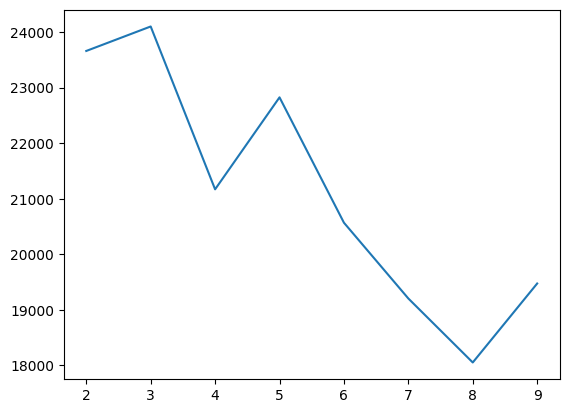

In [52]:
#이너샤 값은 6이 적절해보임
sns.lineplot(x=range(2,10),y=distance)

In [53]:
#실루엣 계수
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2,10):
  k_model = KMeans(n_clusters = k)
  k_model.fit(scaled_df)
  labels = k_model.predict(scaled_df)
  silhouette.append(silhouette_score(scaled_df, labels))

<Axes: >

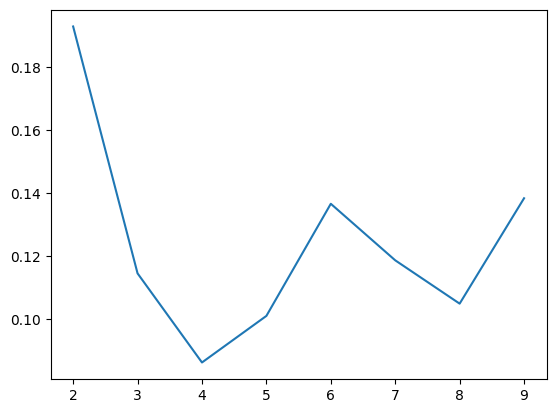

In [54]:
sns.lineplot(x=range(2,10),y=silhouette)

In [57]:
distance

[23661.33303795379,
 24102.194923441708,
 21168.93773586628,
 22825.71588379695,
 20567.930934555174,
 19202.667874631145,
 18050.18825037548,
 19472.5798237884]

In [58]:
silhouette

[np.float64(0.19301316243659017),
 np.float64(0.11452110528586462),
 np.float64(0.08619282112989937),
 np.float64(0.10100096819161328),
 np.float64(0.1366447650309826),
 np.float64(0.11867183784330117),
 np.float64(0.10489673410983891),
 np.float64(0.1384022187389762)]

In [64]:
k_model = KMeans(n_clusters = 6)
k_model.fit(scaled_df)
labels = k_model.predict(scaled_df)

In [65]:
scaled_df['label'] = labels

In [66]:
scaled_df.head()

,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,undergrad_students_2023,freshman_competition_rate_2023,freshman_enrollment_rate_2023,employment_rate_2023,international_students_2023,students_per_faculty_2023,faculty_ratio_based_on_quota_2023,...,region_name_서울,region_name_세종,region_name_울산,region_name_인천,region_name_전남,region_name_전북,region_name_제주,region_name_충남,region_name_충북,label
0,-0.394399,-0.664188,-0.616021,-0.666746,-0.600837,0.436520,0.601820,-0.485739,-0.190953,0.191426,...,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,2
1,-0.453127,-0.733018,-0.667876,-0.711756,-1.157377,-2.496894,-2.270606,-0.487376,-0.493077,-1.071981,...,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,1
2,-0.284284,-0.417243,-0.405143,-0.445460,0.244280,-0.008487,0.422769,-0.459537,-0.065882,-0.114757,...,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,1
3,1.063157,1.589109,2.574810,2.513129,2.305541,0.530365,0.384673,4.004595,-0.209933,0.326324,...,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,1
4,0.150303,0.334460,0.676905,0.219654,-0.394711,-0.668430,0.178956,-0.351455,-0.173672,0.197355,...,-0.429525,-0.095455,-0.106843,-0.16686,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,1


In [68]:
scaled_df_mean = scaled_df.groupby('label').mean()#그룹별로 분석
scaled_df_count = scaled_df.groupby('label').count()['undergrad_admission_quota_2023']#변수의 수가 필요한 것이기 때문에 어떤 변수가 와도 상관없다

In [69]:
scaled_df_count = scaled_df_count.rename('count')

In [70]:
scaled_df_all = scaled_df_mean.join(scaled_df_count)

In [71]:
scaled_df_all

,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,undergrad_students_2023,freshman_competition_rate_2023,freshman_enrollment_rate_2023,employment_rate_2023,international_students_2023,students_per_faculty_2023,faculty_ratio_based_on_quota_2023,...,region_name_서울,region_name_세종,region_name_울산,region_name_인천,region_name_전남,region_name_전북,region_name_제주,region_name_충남,region_name_충북,count
label,,,,,,,,,,,,,,,,,,,,,
0,0.557869,0.519546,0.550559,0.630182,-0.043315,0.144317,-0.113384,-0.068421,0.302663,-0.095819,...,-0.166889,-0.095455,-0.106843,-0.020195,0.195253,0.087936,0.064216,-0.072142,0.258375,42
1,0.045432,0.122342,0.283525,0.245457,0.327375,0.177563,-0.092497,0.348591,0.061352,0.196119,...,0.302983,0.014666,-0.008236,-0.038528,-0.116635,-0.046209,-0.084944,0.093308,0.019672,192
2,-0.384917,-0.622594,-0.582891,-0.655681,-0.842462,-0.297170,0.118532,-0.486103,-0.267841,0.379151,...,-0.276321,0.198201,0.156110,0.175357,0.266797,0.016392,0.096037,0.072251,-0.074586,36
3,-0.118766,-0.154397,-0.425407,-0.336626,-0.196585,-0.230632,0.090584,-0.303533,-0.078943,-0.312557,...,-0.229957,-0.025905,0.017714,-0.045283,0.062519,0.062519,0.084314,-0.078475,-0.049330,152
4,-0.054776,-0.045316,0.022568,-0.059938,-0.030554,0.391279,0.329434,-0.110998,-0.105802,0.020299,...,-0.429525,-0.095455,-0.106843,-0.166860,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,18
5,0.247327,0.462259,2.559830,0.751725,-0.092392,-0.480740,-0.481372,0.526306,-0.315126,-0.045488,...,0.489700,-0.095455,-0.106843,3.939748,-0.234013,-0.234013,-0.126709,-0.264666,-0.211687,3


#각 군집의 특징 분석
##Label 0 → "선택형 중견 대학" (42개교)
###주요 특징:

- 입학정원과 졸업생 수가 중간 수준 (0.56, 0.52)
- 경쟁률이 낮음 (-0.04)
- 등록률이 양호 (0.14)
- 취업률이 다소 낮음 (-0.11)
- 교원 1인당 학생 수가 적절 (0.30)
- 등록금이 낮은 편 (-0.74)
- 주로 4년제 대학 (0.83)
- 사립대학이 많음 (2.97)

##Label 1 → "안정형 지역 대학" (192개교)
###주요 특징:

- 모든 지표가 평균 근처에 위치 (대부분 -0.5 ~ 0.5 범위)
- 외국인 학생 비율이 높음 (0.35)
- 등록금 수준이 평균적 (0.56)
- 취업률이 평균 수준 (-0.09)
- 4년제 대학 중심 (0.83)
- 가장 많은 수의 대학이 속함 (일반적인 대학 형태)

##Label 2 → "소규모 전문 대학" (36개교)
###주요 특징:

- 입학정원, 졸업생, 재학생 모두 적음 (-0.38, -0.62, -0.66)
- 경쟁률이 매우 낮음 (-0.84)
- 등록률도 낮음 (-0.30)
- 취업률은 양호 (0.12)
- 기숙사 수용률이 높음 (1.63)
- 전문대학 비율이 높음 (0.98)
- 기능대학 특성 (3.10)

##Label 3 → "교육 특화 대학" (152개교)
###주요 특징:

- 규모가 작은 편 (-0.12, -0.15, -0.43)
- 경쟁률과 등록률이 낮음 (-0.20, -0.23)
- 취업률이 양호 (0.09)
- 교원 비율이 높음 (1.24)
- 교육비 지출이 높음 (0.79)
- 전문대학 비율이 높음 (1.06)
- 교육대학 특성 (0.09)

##Label 4 → "균형형 지역 대학" (18개교)
###주요 특징:

- 대부분 지표가 평균 근처
- 등록률이 높음 (0.39)
- 취업률이 좋음 (0.33)
- 장학금 지급이 많음 (0.39)
- 충남 지역에 집중 (4.86)
- 소수의 안정적인 대학들

##Label 5 → "대형 연구 중심 대학" (3개교)
###주요 특징:

- 전임교원 수가 매우 많음 (2.56)
- 재학생 수가 많음 (0.75)
- 교원 1인당 학생 수가 많음 (-0.32)
- 등록금이 낮음 (-0.74)
- 국립대학 특성 (12.11)
- 전남 지역에 집중 (3.94)
- 소수의 대형 국립대학

#주요 인사이트
##1. 대학 생태계의 다양성

- 한국 대학은 규모, 특성, 설립 유형에 따라 6개의 뚜렷한 군집으로 분류됨
- 가장 많은 비율을 차지하는 것은 "안정형 지역 대학"(192개교, 43%)

##2. 대학 유형별 특화 전략

- 대형 연구 중심 대학: 국립대 중심의 소수 엘리트 대학 (3개교)
- 교육 특화 대학: 전문대학 중심의 직업교육 특화 (152개교)
- 소규모 전문 대학: 기능대학 등 특수 목적 교육기관 (36개교)

##3. 지역별 대학 분포 특성

- 충남: 균형형 지역 대학이 집중 (4.86)
- 전남: 대형 연구 중심 대학이 위치 (3.94)
- 지역별로 대학의 특성이 다르게 나타남

##4. 대학 운영의 효율성 차이

- 소규모 전문 대학: 높은 기숙사 수용률 (1.63)로 학생 지원 특화
- 교육 특화 대학: 높은 교원 비율 (1.24)로 교육 질 중시
- 대형 연구 중심 대학: 낮은 등록금 (-0.74)으로 공공성 강화

##5. 대학 선택 시 고려사항

- 각 군집마다 경쟁률, 등록률, 취업률이 다르게 나타남
- 학생들은 자신의 목표에 맞는 대학 유형을 선택할 수 있음

In [101]:
len(scaled_df_all.columns)   # 컬럼 개수

59

In [72]:
#컬럼이 너무 많아서 특징을 보기 힘들다..
scaled_df_all.columns

Index(['undergrad_admission_quota_2023', 'undergrad_graduates_2023',
       'full_time_faculty_2023', 'undergrad_students_2023',
       'freshman_competition_rate_2023', 'freshman_enrollment_rate_2023',
       'employment_rate_2023', 'international_students_2023',
       'students_per_faculty_2023', 'faculty_ratio_based_on_quota_2023',
       'faculty_ratio_based_on_enrollment_2023', 'faculty_teaching_ratio_2023',
       'scholarship_per_student_2023', 'annual_tuition_2024',
       'education_cost_per_student_2023', 'dorm_capacity_rate_2023',
       'books_per_student_2023', 'campus_name_본교', 'campus_name_분교',
       'campus_name_제2캠퍼스', 'campus_name_제3캠퍼스', 'campus_name_제4캠퍼스',
       'school_type_대학', 'school_type_전문대학', 'school_category_각종학교(대학)',
       'school_category_각종학교(전문)', 'school_category_교육대학',
       'school_category_기능대학', 'school_category_기술대학', 'school_category_대학교',
       'school_category_방송통신대학', 'school_category_사이버대학(대학)',
       'school_category_사이버대학(전문대학)', 's

In [78]:
from sklearn.decomposition import PCA

var_ratio = []
n_features = scaled_df.shape[1]  # 최대 주성분 수

# 10부터 최대 59까지 10 간격으로 확인
for i in range(10, n_features+1, 10):
    pca = PCA(n_components=i)
    pca.fit(scaled_df)
    ratio = pca.explained_variance_ratio_.sum()
    var_ratio.append((i, ratio))

# 결과 출력
for i, ratio in var_ratio:
    print(f"n_components={i}, explained variance ratio={ratio:.4f}")


n_components=10, explained variance ratio=0.4827
n_components=20, explained variance ratio=0.6914
n_components=30, explained variance ratio=0.8593
n_components=40, explained variance ratio=0.9722
n_components=50, explained variance ratio=0.9996


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

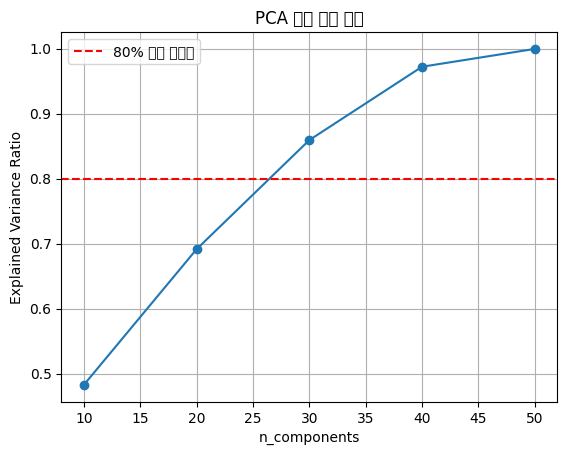

In [77]:
import matplotlib.pyplot as plt

components, ratios = zip(*var_ratio)
plt.plot(components, ratios, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% 설명 분산선')
plt.xlabel('n_components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA 설명 분산 비율')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 차원 축소
pca = PCA(n_components=30)
pca_df = pca.fit_transform(scaled_df)



In [88]:
distance = []
for k in range(2,10):
  k_model = KMeans(n_clusters=k)
  k_model.fit(pca_df)
  distance.append(k_model.inertia_)

In [89]:
silhouette = []
#군집의 개수를 변화시켜가며 실루엣 계수 계산
for k in range(2,10):
  k_model = KMeans(n_clusters = k)
  k_model.fit(pca_df)
  labels = k_model.predict(pca_df)
  silhouette.append(silhouette_score(pca_df, labels))

<Axes: >

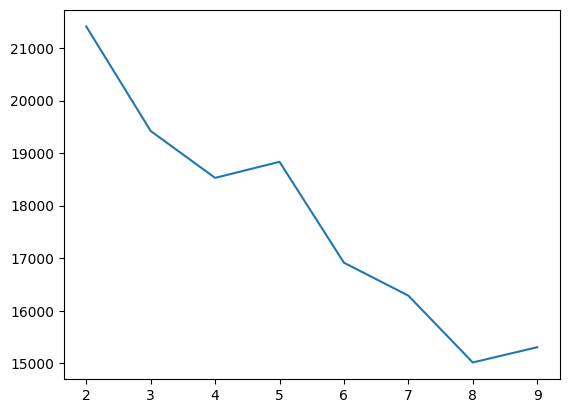

In [90]:
sns.lineplot(x=range(2,10),y=distance)

<Axes: >

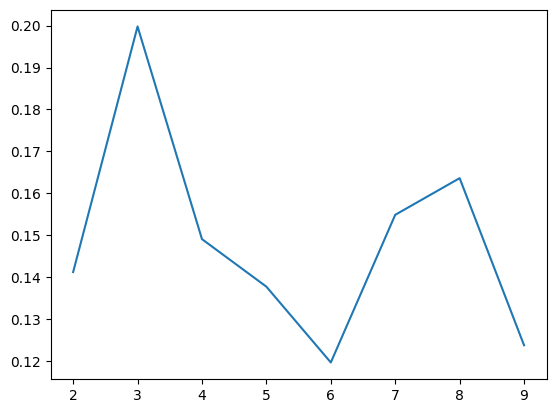

In [91]:
sns.lineplot(x=range(2,10),y=silhouette)

In [92]:
distance

[21408.85115583534,
 19420.865489736963,
 18528.767841671797,
 18834.602798218177,
 16915.255273509003,
 16288.92700292479,
 15017.236008029973,
 15307.620191304457]

In [93]:
silhouette

[np.float64(0.14123495180802972),
 np.float64(0.19979667719294109),
 np.float64(0.14908475545166494),
 np.float64(0.13774800200357398),
 np.float64(0.11967080963760464),
 np.float64(0.15488123924097816),
 np.float64(0.1636222857145147),
 np.float64(0.12377581187986449)]

In [94]:
k_model = KMeans(n_clusters = 3)
k_model.fit(pca_df)
labels = k_model.predict(pca_df)

In [97]:
pca_df

array([[ 2.38953523, -0.52976074,  0.27446942, ...,  0.10771518,
        -0.20722377,  0.12293277],
       [ 1.2115313 ,  1.14498648, -5.43649164, ..., -0.42499209,
        -0.38511242, -1.37955519],
       [-0.80611472, -1.21293551, -0.64712944, ...,  0.16485901,
         1.05279982,  0.5720942 ],
       ...,
       [-2.39864938, -2.20742513, -1.1195358 , ..., -0.50949593,
        -1.39244529, -1.48435603],
       [-0.42823174, -1.09915859, -1.01337579, ...,  0.180338  ,
         0.53687494,  0.45548071],
       [ 0.23141636,  2.04946613, -2.63949513, ...,  0.06759231,
        -0.43716439,  0.40423505]])

##생각해보니까 pca를 거치면 변수명이 다 사라진다..
##pca를 거치면 군집화가 가능한가?

In [95]:
pca_df['label'] = labels

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices